<a href="https://colab.research.google.com/github/KrivonosMax/lr1/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
# Случайные процессы и шум
***

## Задание 1: Генерация и анализ белого гауссовского шума
**Цель:**

Научиться генерировать белый шум и вычислять его статистические характеристики.

**Описание:**

1. Сгенерируйте белый гауссовский шум с помощью `numpy.random.normal()`.
2. Рассчитайте математическое ожидание и дисперсию полученной выборки.
3. Постройте график шума.

**Рекомендации:**

Экспериментируйте с параметрами (например, стандартным отклонением) и сравнивайте результаты.

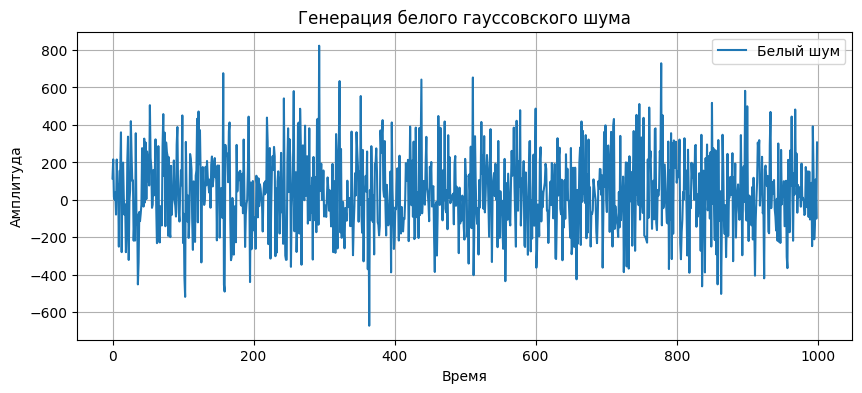

43575.24281786867 34.89843098721003


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Параметры генерации шума
N = 1000
mu = random.randint(1,100)
sigma = random.randint(0,500)

# Генерация белого гауссовского шума
white_noise = np.random.normal(mu, sigma, N)

# Визуализация шума
plt.figure(figsize=(10, 4))
plt.plot(white_noise, label='Белый шум')
plt.title("Генерация белого гауссовского шума")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)
plt.show()

med = np.mean(white_noise)
var = np.var(white_noise)

print(var, med)

## Задание 2: Моделирование цветного шума через фильтрацию
**Цель:**

Получить цветной шум путём фильтрации белого шума.

**Описание:**

1. Сгенерируйте белый шум.
2. Примените фильтр (например, фильтр первого порядка с использованием scipy.signal.lfilter) для изменения спектральных характеристик.
3. Визуализируйте цветной шум и сравните его с исходным белым шумом.

**Рекомендации:**

Изменяйте коэффициенты фильтра и анализируйте влияние на автокорреляцию и спектральную плотность.

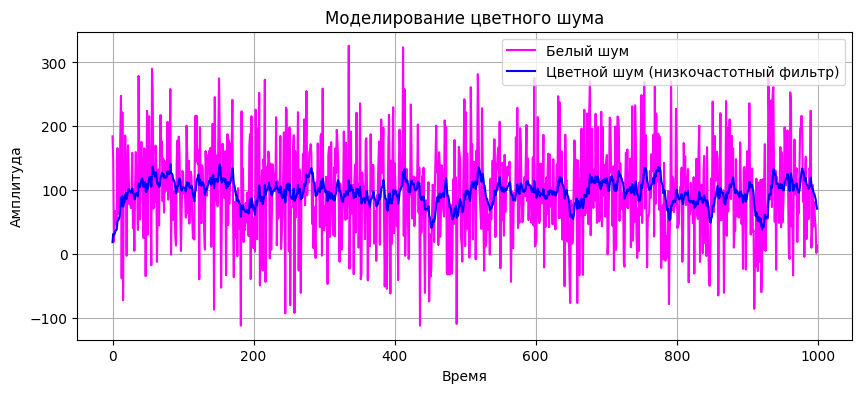

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import lfilter

# Генерация белого шума
N = 1000
white_noise = np.random.normal(random.randint(1,100), random.randint(2,100), N)

# Параметры низкочастотного фильтра (например, фильтр первого порядка)
b = [0.1]
a = [1, -0.9]

# Применение фильтра к белому шуму для получения цветного шума
colored_noise = lfilter(b, a, white_noise)

# Визуализация результатов
plt.figure(figsize=(10, 4))
plt.plot(white_noise, color = (1.0, 0.0, 1.0), label='Белый шум')
plt.plot(colored_noise, color = (0.0, 0.0, 1.0), label='Цветной шум (низкочастотный фильтр)')
plt.title("Моделирование цветного шума")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)
plt.show()

## Задание 3: Моделирование случайного блуждания
**Цель:**

Смоделировать процесс случайного блуждания и изучить его эволюцию.

**Описание:**

1. Создайте последовательность случайных приращений (например, используя нормальное распределение).
2. Используйте функцию np.cumsum() для накопления приращений.
3. Постройте график траектории случайного блуждания.

**Рекомендации:**

Рассчитайте итоговое среднее смещение и дисперсию траектории.

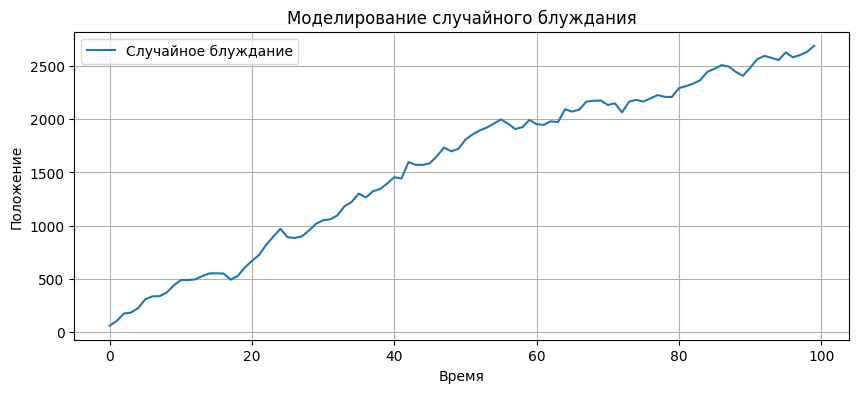

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
N = 100
steps = np.random.normal(random.randint(1,50), random.randint(50,100), N)  # приращения (например, гауссовские)
random_walk = np.cumsum(steps)

# Визуализация случайного блуждания
plt.figure(figsize=(10, 4))
plt.plot(random_walk, label='Случайное блуждание')
plt.title("Моделирование случайного блуждания")
plt.xlabel("Время")
plt.ylabel("Положение")
plt.legend()
plt.grid(True)
plt.show()

## Задание 4: Спектральный анализ белого шума
**Цель:**

Изучить спектральные характеристики белого шума с помощью быстрого преобразования Фурье (FFT).

**Описание:**

1. Вычислите FFT белого шума, сгенерированного в Задании 1.
2. Постройте график спектральной плотности мощности.
3. Проверьте, насколько спектр получился «плоским».

**Рекомендации:**

Используйте `np.fft.fft` и `np.fft.fftfreq` для вычислений.

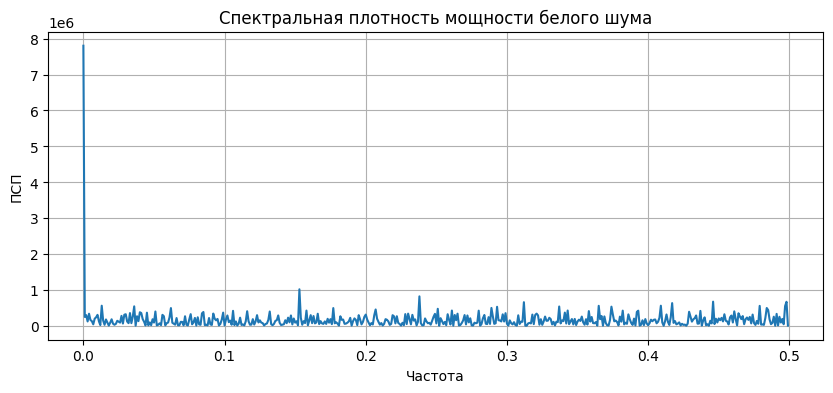

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Параметры генерации шума
N = 1000          # число точек
mu = random.randint(1,100)
sigma = random.randint(0,500)

# Генерация белого гауссовского шума
white_noise = np.random.normal(mu, sigma, N)

# Вычисление FFT и спектральной плотности мощности
fft_vals = np.fft.fft(white_noise)
fft_freq = np.fft.fftfreq(N, d=1)
psd = np.abs(fft_vals) ** 2 / N

# Визуализация спектральной плотности мощности
plt.figure(figsize=(10, 4))
plt.plot(fft_freq[:N//2], psd[:N//2])
plt.title("Спектральная плотность мощности белого шума")
plt.xlabel("Частота")
plt.ylabel("ПСП")
plt.grid(True)
plt.show()

## Задание 5: Спектральный анализ цветного шума
**Цель:**

Сравнить спектральную плотность мощности цветного шума с белым шумом.

**Описание:**

1. Используйте данные, полученные в Задании 2.
2. Вычислите FFT цветного шума.
3. Постройте и сравните графики спектральной плотности для белого и цветного шума.

**Рекомендации:**

Обратите внимание на выделение основных частотных компонент после фильтрации.


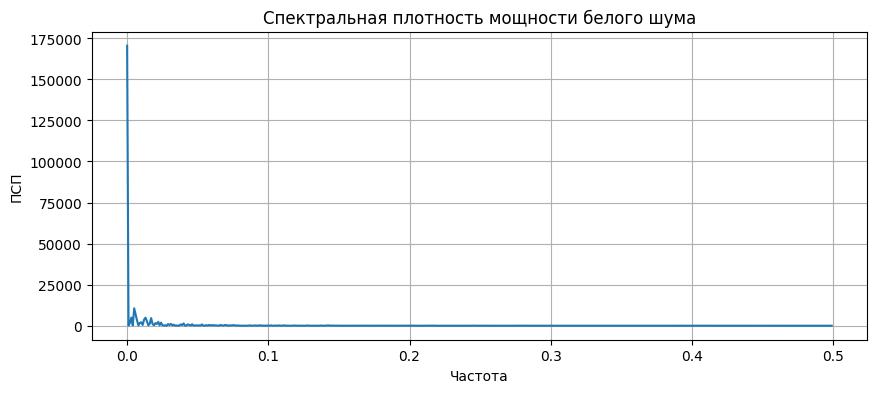

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy

# Параметры генерации шума
N = 1000          # число точек
mu = random.randint(1,100)
sigma = random.randint(0,500)

# Генерация белого гауссовского шума
white_noise = np.random.normal(mu, sigma, N)

# Параметры низкочастотного фильтра (например, фильтр первого порядка)
b = [0.1]
a = [1, -0.9]

# Применение фильтра к белому шуму для получения цветного шума
colored_noise = scipy.signal.lfilter(b, a, white_noise)

# Вычисление FFT и спектральной плотности мощности
fft_vals = np.fft.fft(colored_noise)
fft_freq = np.fft.fftfreq(N, d=1)
psd = np.abs(fft_vals) ** 2 / N

# Визуализация спектральной плотности мощности
plt.figure(figsize=(10, 4))
plt.plot(fft_freq[:N//2], psd[:N//2])
plt.title("Спектральная плотность мощности белого шума")
plt.xlabel("Частота")
plt.ylabel("ПСП")
plt.grid(True)
plt.show()


## Задание 6: Анализ амплитудного и фазового спектров синусоидального сигнала

**Цель:**

Научиться выделять амплитудный и фазовый спектры из комплексного сигнала.

**Описание:**

1. Сгенерируйте сигнал, состоящий из суммы двух или более синусоид с разными частотами.
2. Вычислите FFT этого сигнала.
3. Постройте графики амплитудного и фазового спектров, выделив доминирующие частоты.

**Рекомендации:**

Используйте функции `np.abs()` и `np.angle()` для получения амплитуды и фазы соответственно.


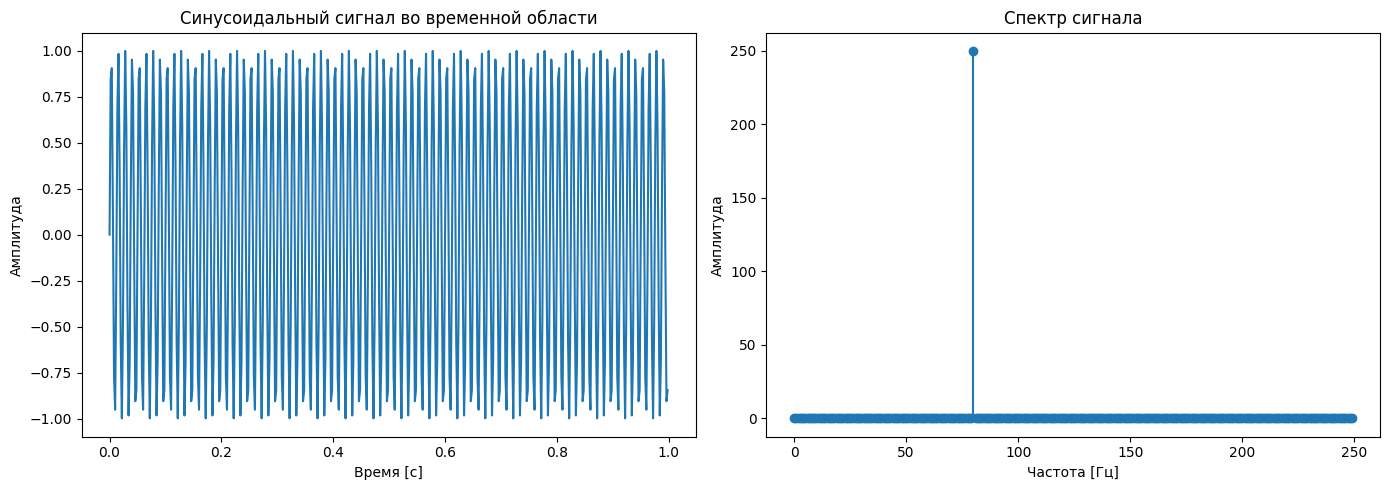

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Параметры сигнала
fs = 500           # Частота дискретизации, Гц
T = 1.0            # Продолжительность сигнала, сек
N = int(fs * T)    # Количество отсчетов
t = np.linspace(0, T, N, endpoint=False)

# Параметры синусоиды
A = 1.0            # Амплитуда
f = 80             # Частота сигнала, Гц
phi = 0            # Фаза

# Генерация сигнала
signal = A * np.sin(2 * np.pi * f * t + phi)

# Вычисление БПФ
yf = fft(signal)
xf = fftfreq(N, 1/fs)

# Построение графиков
plt.figure(figsize=(14, 5))

# Временная область
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title("Синусоидальный сигнал во временной области")
plt.xlabel("Время [с]")
plt.ylabel("Амплитуда")

# Частотная область (берем модуль БПФ)
plt.subplot(1, 2, 2)
plt.stem(xf[:N//2], np.abs(yf[:N//2]), basefmt=" ")
plt.title("Спектр сигнала")
plt.xlabel("Частота [Гц]")
plt.ylabel("Амплитуда")
plt.tight_layout()
plt.show()


## Задание 7: Приближение дельта-функции Дирака

**Цель:**

Понять идею дельта-функции через её приближение.

**Описание:**

Реализуйте приближение дельта-функции с помощью гауссовой функции с малой дисперсией.
Проверьте свойство выборки: интеграл произведения приближённой дельта-функции и тестовой функции должен приближаться к значению тестовой функции в точке центра.

**Рекомендации:**

Экспериментируйте с уменьшением дисперсии и наблюдайте за поведением интеграла.

In [17]:
import numpy as np
from scipy.integrate import quad

# Параметры
mu = 1.0      # Центр гауссовой функции
sigma = 0.01  # Малая дисперсия

# Гауссова функция как приближение дельта-функции
gaussian = lambda x: (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Тестовая функция
test_function = lambda x: np.sin(x) + x**2  # Пример: f(x) = sin(x) + x^2

# Интеграл произведения тестовой функции и гауссовой функции
integral, _ = quad(lambda x: test_function(x) * gaussian(x), -np.inf, np.inf)

# Значение тестовой функции в точке центра
f_mu = test_function(mu)

# Вывод результатов
print("Интеграл:", integral)
print("Значение тестовой функции в точке центра:", f_mu)

Интеграл: 1.8415289123104772
Значение тестовой функции в точке центра: 1.8414709848078965


## Задание 8: Применение дельта-функции в системах (импульсная характеристика)

**Цель:**

Смоделировать отклик системы на импульсное воздействие.

**Описание:**

1. Определите импульсную характеристику системы, используя дельта-функцию (или её приближение).
2. Проведите свёртку сигнала с импульсной характеристикой для моделирования отклика системы.
3. Визуализируйте входной сигнал и полученный отклик.

**Рекомендации:**

Используйте функцию `np.convolve()` для реализации свёртки.

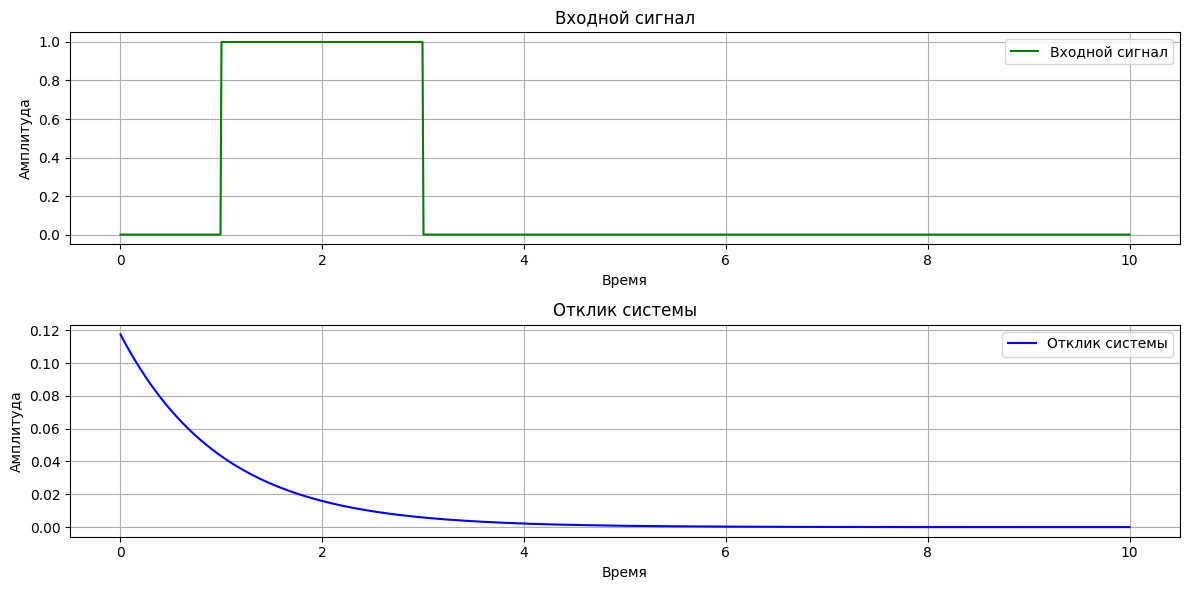

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Шаг 1: Определим входной сигнал и импульсную характеристику
def input_signal(t):
    # Пример входного сигнала: прямоугольный импульс
    return np.where((t >= 1) & (t <= 3), 1, 0)

def impulse_response(t):
    # Импульсная характеристика: экспоненциально затухающий сигнал
    return np.exp(-t) * (t >= 0)

# Шаг 2: Проведём свёртку
# Временной интервал
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]  # Шаг дискретизации

# Входной сигнал и импульсная характеристика
f = input_signal(t)
h = impulse_response(t)

# Свёртка
y = np.convolve(f, h, mode='same') * dt

# Шаг 3: Визуализация
plt.figure(figsize=(12, 6))

# График входного сигнала
plt.subplot(2, 1, 1)
plt.plot(t, f, label="Входной сигнал", color="green")
plt.title("Входной сигнал")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()

# График отклика системы
plt.subplot(2, 1, 2)
plt.plot(t, y, label="Отклик системы", color="blue")
plt.title("Отклик системы")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## Задание 9: Вычисление и анализ автокорреляционной функции

**Цель:**

Изучить автокорреляцию белого и цветного шума.

**Описание:**

1. Для сигналов из Заданий 1 и 2 вычислите автокорреляционную функцию.
2. Постройте графики автокорреляции для каждого типа шума.
3. Сравните полученные результаты: для белого шума автокорреляция должна быть узкой (почти нулевая за пределами нуля), а для цветного – иметь более выраженную зависимость от временного лага.

**Рекомендации:**

Используйте `np.correlate()` или `scipy.signal.correlate()` для расчёта автокорреляции.


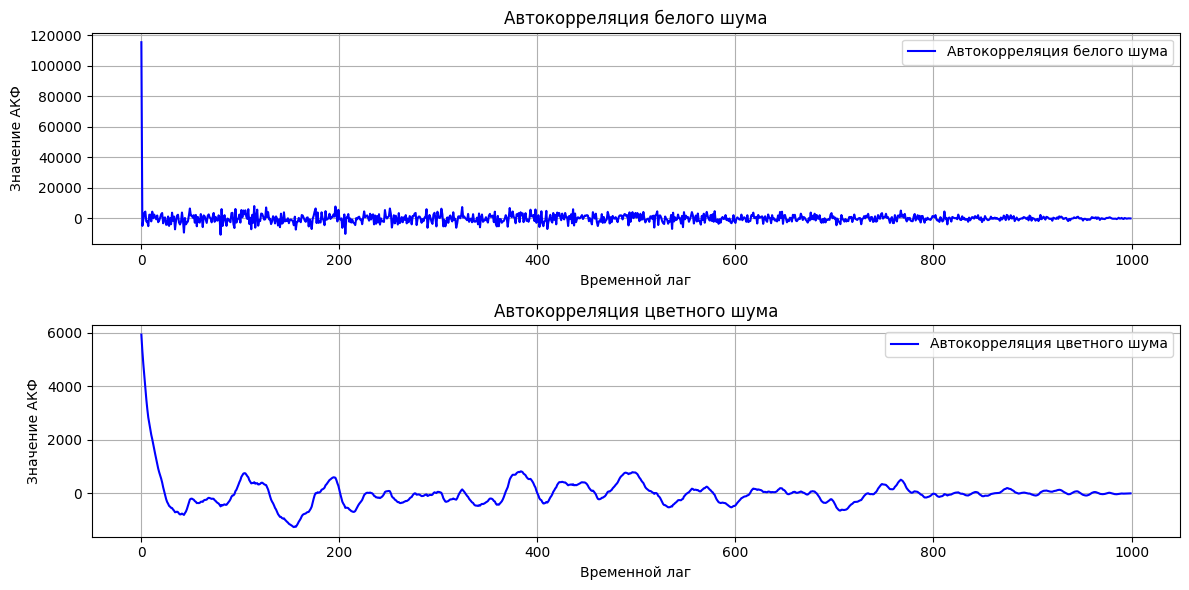

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy

# Функция для вычисления автокорреляции
def autocorrelation(x):
    N = len(x)
    mean = np.mean(x)
    x_centered = x - mean
    acf = np.correlate(x_centered, x_centered, mode='full') / N
    return acf[N-1:]  # Берём только положительные лаги

# Параметры генерации шума
N = 1000          # число точек
mu = random.randint(1,100)            # математическое ожидание
sigma = random.randint(0,500)         # стандартное отклонение

# Параметры генерации шума
N = 1000          # число точек
mu = random.randint(1,100)            # математическое ожидание
sigma = random.randint(0,500)         # стандартное отклонение

# Генерация белого гауссовского шума
white_noise = np.random.normal(mu, sigma, N)

# Параметры низкочастотного фильтра (например, фильтр первого порядка)
b = [0.1]            # коэффициенты числителя
a = [1, -0.9]        # коэффициенты знаменателя

# Применение фильтра к белому шуму для получения цветного шума
colored_noise = scipy.signal.lfilter(b, a, white_noise)

# Вычисление автокорреляции
acf_white = autocorrelation(white_noise)
acf_colored = autocorrelation(colored_noise)

# Временные лаги
lags = np.arange(len(acf_white))

# Построение графиков
plt.figure(figsize=(12, 6))

# График автокорреляции белого шума
plt.subplot(2, 1, 1)
plt.plot(lags, acf_white, label="Автокорреляция белого шума", color="blue")
plt.title("Автокорреляция белого шума")
plt.xlabel("Временной лаг")
plt.ylabel("Значение АКФ")
plt.grid()
plt.legend()

# График автокорреляции цветного шума
plt.subplot(2, 1, 2)
plt.plot(lags, acf_colored, label="Автокорреляция цветного шума", color="blue")
plt.title("Автокорреляция цветного шума")
plt.xlabel("Временной лаг")
plt.ylabel("Значение АКФ")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## Задание 10: Комбинированное моделирование сигнала с шумом и его спектральный анализ

**Цель:**

Смоделировать сигнал, содержащий как определённые синусоидальные компоненты, так и шум, и провести спектральный анализ для выделения основных частот.

**Описание:**

1. Создайте сигнал, состоящий из нескольких синусоид (с разными амплитудами и частотами).
2. Добавьте к сигналу белый шум.
3. Вычислите FFT полученного сигнала и постройте амплитудный спектр.
4. Попробуйте выделить синусоидальные компоненты, возможно, с помощью фильтрации или порогового отсечения спектра.

**Рекомендации:**

Экспериментируйте с уровнем шума, чтобы оценить его влияние на спектральное представление сигнала.

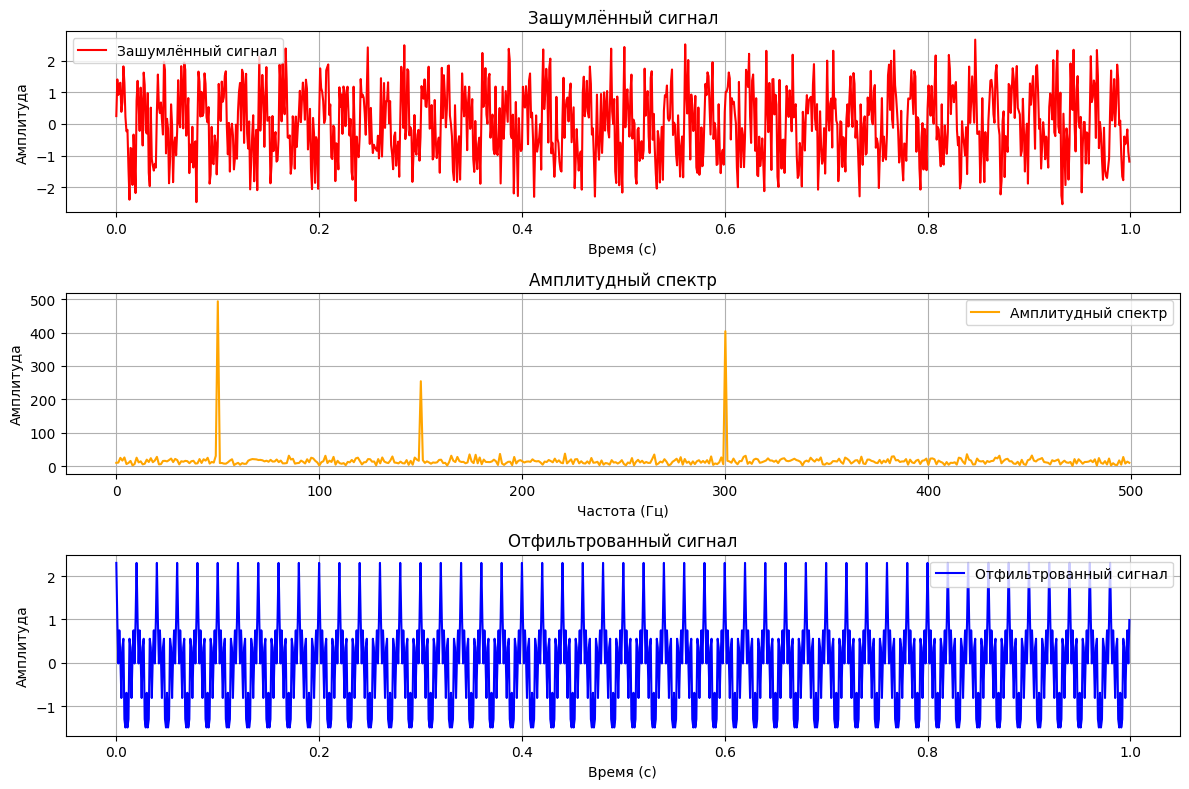

In [26]:
import numpy as np
import matplotlib.pyplot as plt


# Параметры сигнала
fs = 1000  # Частота дискретизации (Гц)
t = np.linspace(0, 1, fs, endpoint=False)  # Временной интервал (1 секунда)

# Синусоидальные компоненты
f1, f2, f3 = 50, 150, 300  # Частоты (Гц)
A1, A2, A3 = 1, 0.5, 0.8  # Амплитуды
signal = A1 * np.sin(2 * np.pi * f1 * t) + \
         A2 * np.sin(2 * np.pi * f2 * t) + \
         A3 * np.sin(2 * np.pi * f3 * t)

# Добавление белого шума
np.random.seed(42)
noise = np.random.normal(0, 0.5, len(t))  # Белый шум с дисперсией 0.5
noisy_signal = signal + noise

# Вычисление FFT
fft_result = np.fft.fft(noisy_signal)
frequencies = np.fft.fftfreq(len(t), d=1/fs)  # Частоты
amplitude_spectrum = np.abs(fft_result)  # Амплитудный спектр

# Пороговое отсечение спектра
threshold = 0.1 * np.max(amplitude_spectrum)  # Порог (10% от максимальной амплитуды)
filtered_spectrum = np.where(amplitude_spectrum > threshold, amplitude_spectrum, 0)

# Обратное FFT для восстановления сигнала
filtered_signal = np.fft.ifft(filtered_spectrum)

# Построение графиков
plt.figure(figsize=(12, 8))

# График исходного сигнала и зашумлённого сигнала
plt.subplot(3, 1, 1)
plt.plot(t, noisy_signal, label="Зашумлённый сигнал", color="red")
plt.title("Зашумлённый сигнал")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()

# График амплитудного спектра
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], amplitude_spectrum[:len(amplitude_spectrum)//2],
         label="Амплитудный спектр", color="orange")
plt.title("Амплитудный спектр")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()

# График отфильтрованного сигнала
plt.subplot(3, 1, 3)
plt.plot(t, np.real(filtered_signal), label="Отфильтрованный сигнал", color="blue")
plt.title("Отфильтрованный сигнал")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()